In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rc('figure', figsize=(12,9))
mpl.rc('font', size=20.)
mpl.rc('font', family='serif')
mpl.rc('text', usetex=True)
mpl.rc('axes', color_cycle=['k','b','g','r','k','b','g','r'])
import pyGadget

# Sink Accretion History

In [2]:
simV = pyGadget.sim.Simulation('stampede/vanilla', track_sinks=True)
sim1 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-3', track_sinks=True)
sim2 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-2', track_sinks=True)
sim3 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-1', track_sinks=True)

name = ['J = 0', 'J = J$_0$', 'J = 10 J$_0$', 'J = 100 J$_0$', 'J = 1000 J$_0$']

No sink specified: Selecting first sink to form...
Key set: nform = 1
Using sink ID 3103667
Found sinkfiles.  Loading sinkdata.
Key set: nform = 2
Using sink ID 3975878
No sink specified: Selecting first sink to form...
Key set: nform = 1
Using sink ID 3362134
Found sinkfiles.  Loading sinkdata.
Key set: nform = 2
Using sink ID 4394567
Key set: nform = 3
Using sink ID 4011741
No sink specified: Selecting first sink to form...
Key set: nform = 1
Using sink ID 3768236
Found sinkfiles.  Loading sinkdata.
Key set: nform = 2
Using sink ID 3755849
Key set: nform = 3
Using sink ID 3754749
Key set: nform = 4
Using sink ID 3975112
Key set: nform = 5
Using sink ID 4088092
Key set: nform = 6
Using sink ID 3719531
Key set: nform = 7
Using sink ID 4088845
Key set: nform = 8
Using sink ID 4407511
Key set: nform = 9
Using sink ID 4015446
Key set: nform = 10
Using sink ID 4958838
No sink specified: Selecting first sink to form...
Key set: nform = 1
Using sink ID 3962586
Found sinkfiles.  Loading sinkd

In [3]:
sinkdata = pd.HDFStore(simV.plotpath+'sinkdata.hdf5')
data0 = sinkdata['vanilla']
data1 = sinkdata['XR_sfr_1e-3']
data2 = sinkdata['XR_sfr_1e-2']
data3 = sinkdata['XR_sfr_1e-1']

In [4]:
sinksV = data0.set_index('time')
sinks1 = data1.set_index('time')
sinks2 = data2.set_index('time')
sinks3 = data3.set_index('time')

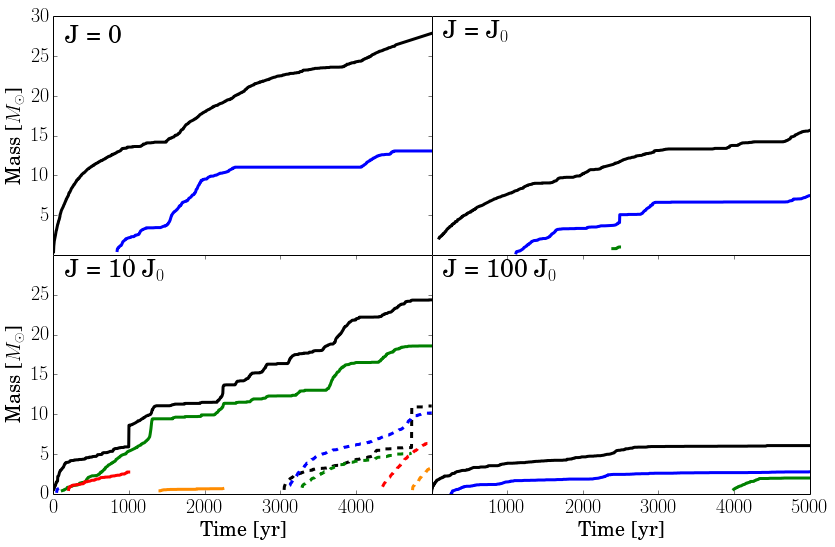

In [5]:
mpl.rc('axes', color_cycle=['k','b','g','r','darkorange','k','b','g','r','darkorange'])
fig = plt.figure(2, figsize=(12,8))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)



slw = 3
sls = ['-', '--']


for sink in simV.sinks:
    growth = sinksV[sinksV.ID == sink.sink_id]['mass']
    ax0 = growth.plot(ax=ax0, grid=False, lw=3)
    
for sink in sim1.sinks:
    growth = sinks1[sinks1.ID == sink.sink_id]['mass']
    ax1 = growth.plot(ax=ax1, grid=False, lw=3)
    
for i,sink in enumerate(sim2.sinks):
    growth = sinks2[sinks2.ID == sink.sink_id]['mass']
    ax2 = growth.plot(ax=ax2, grid=False, lw=3, ls=sls[i/5])
    
for sink in sim3.sinks:
    growth = sinks3[sinks3.ID == sink.sink_id]['mass']
    ax3 = growth.plot(ax=ax3, grid=False, lw=3)
    
'''
for sink in sim1.sinks:
    idx = sink.sink_id
    time = sinks1[idx].time
    time = np.append(time[0],time)
    mass = np.append(np.zeros(1), sinks1[idx].mass)
    ax1.plot(time, mass, lw=slw)

count = 0
for sink in sim2.sinks:
    idx = sink.sink_id
    time = sinks2[idx].time
    time = np.append(time[0],time)
    mass = np.append(np.zeros(1), sinks2[idx].mass)
    ax2.plot(time, mass, lw=slw, ls=sls[count/4])
    count += 1

for sink in sim3.sinks:
    idx = sink.sink_id
    time = sinks3[idx].time
    time = np.append(time[0],time)
    mass = np.append(np.zeros(1), sinks3[idx].mass)
    ax3.plot(time, mass, lw=slw)
'''
ax0.xaxis.set_visible(False)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax3.yaxis.set_visible(False)


for ax in fig.axes:
    ax.set_xlim(0,5000)
    ax.set_ylim(0,30)
ax0.set_yticks((5,10,15,20,25,30))
ax2.set_yticks((0,5,10,15,20,25))
ax2.set_xticks((0,1000,2000,3000,4000))
ax3.set_xticks((1000,2000,3000,4000,5000))

ax0.set_ylabel('Mass [$M_{\odot}$]')
ax2.set_ylabel('Mass [$M_{\odot}$]')
ax2.set_xlabel('Time [yr]')
ax3.set_xlabel('Time [yr]')

ax0.text(.03,.97, r'J = 0', ha='left', va='top', size=25, transform=ax0.transAxes)
ax1.text(.03,.97, r'J = J$_{0}$', ha='left', va='top', size=25, transform=ax1.transAxes)
ax2.text(.03,.97, r'J = 10 J$_{0}$', ha='left', va='top', size=25, transform=ax2.transAxes)
ax3.text(.03,.97, r'J = 100 J$_{0}$', ha='left', va='top', size=25, transform=ax3.transAxes)

plt.tight_layout(w_pad=0.0,h_pad=0.0)
fig.savefig('figures/sinks/sink_masses.png', bbox_inches='tight')
mpl.rc('axes', color_cycle=['k','b','g','r','k','b','g','r'])

In [6]:
total_mass = []
for i,data in enumerate([data0, data1, data2, data3]):
    mtot = data[['time','mass']].groupby('time').sum()
    mtot.rename(columns = {'mass':name[i]}, inplace=True)
    total_mass.append(mtot)

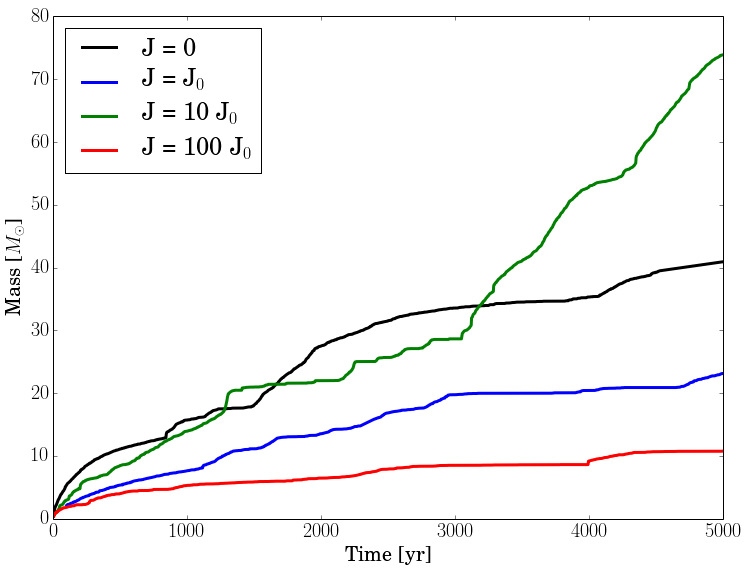

In [7]:
slw = 3
count = 0
plt.figure()
ax = gca()
for mtot in total_mass:
    mtot.plot(ax=ax, grid=False, lw=slw)
    
    
leg = plt.legend(loc=0)
plt.xlim(0,5000)
plt.ylim(0,80)
#plt.ylim(1,100); plt.semilogy()

plt.ylabel('Mass [$M_{\odot}$]')
plt.xlabel('Time [yr]')
plt.savefig('figures/sinks/total_sink_mass.png', bbox_inches='tight')

In [8]:
most_massive_sink = []
for i,data in enumerate([data0, data1, data2, data3]):
    mms = data[['time','mass']].groupby('time').max()
    mms.rename(columns = {'mass':name[i]}, inplace=True)
    most_massive_sink.append(mms)

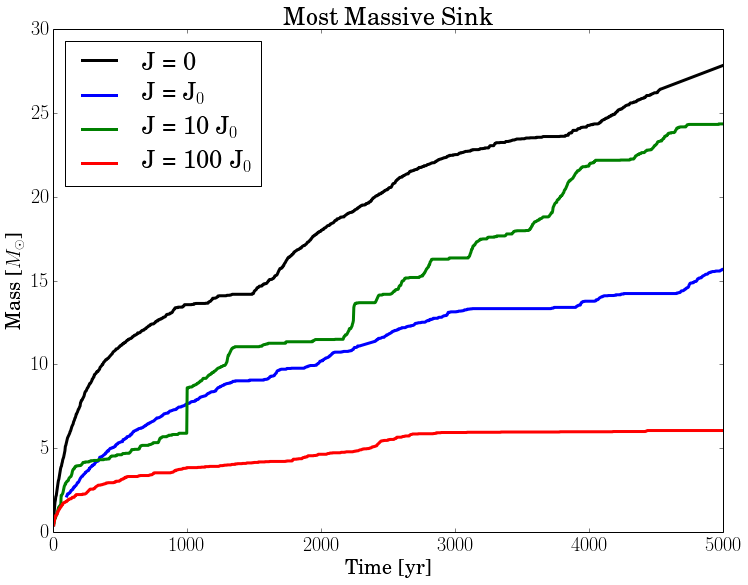

In [9]:
slw = 3
count = 0
plt.figure()
ax = gca()
for mms in most_massive_sink:
    mms.plot(ax=ax, grid=False, lw=slw)
    
leg = plt.legend(loc=0)
plt.xlim(0,5000)
plt.ylim(0,30)
#plt.ylim(1,100); plt.semilogy()

plt.ylabel('Mass [$M_{\odot}$]')
plt.xlabel('Time [yr]')
plt.title('Most Massive Sink')
plt.savefig('figures/sinks/most_massive_sink.png', bbox_inches='tight')

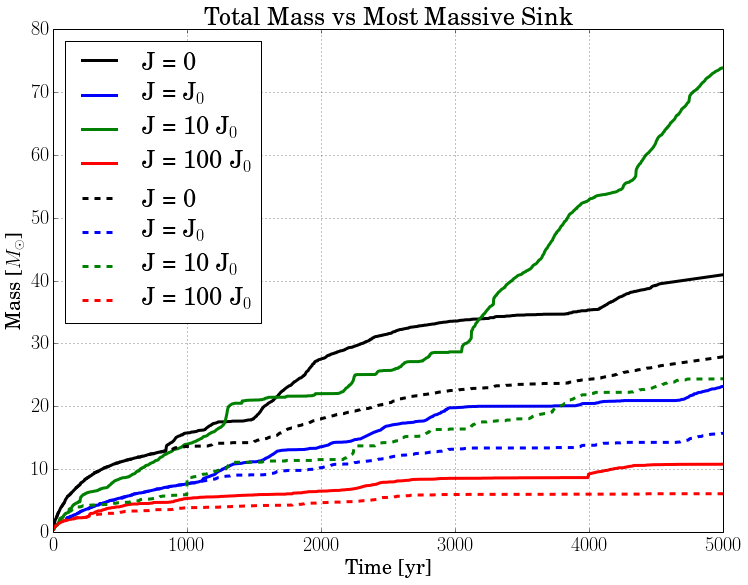

In [10]:
slw = 3

plt.figure()
ax = gca()
for i in xrange(4):
    total_mass[i].plot(ax=ax, lw=slw)
for i in xrange(4):
    most_massive_sink[i].plot(ax=ax, ls='--', lw=slw, label=False)
    
leg = plt.legend(loc=0)
plt.xlim(0,5000)
plt.ylim(0,80)

plt.ylabel('Mass [$M_{\odot}$]')
plt.xlabel('Time [yr]')
plt.title('Total Mass vs Most Massive Sink')
plt.savefig('figures/sinks/mms_comparison.png', bbox_inches='tight')

In [11]:
slw = 3
for i in xrange(4):
    plt.plot(time, biggest_sink[i]/total_mass[i], lw=slw, label=name[i])
leg = plt.legend(loc=0)
plt.xlim(0,5000)
#plt.ylim(0,70)

plt.ylabel('Mass [$M_{\odot}$]')
plt.xlabel('Time [yr]')
plt.title('Mass Fraction')
plt.savefig('figures/sinks/mms_fraction.png', bbox_inches='tight')

ERROR:astropy:NameError: name 'time' is not defined


ERROR: NameError: name 'time' is not defined [IPython.core.interactiveshell]


NameError: name 'time' is not defined

In [ ]:
most_massive_sink = []
for sim in [simV, sim1, sim2, sim3]:
    mms = 0
    for sink in sim.sinks:
        if sink.mass.max() > mms:
            mms = sink.mass.max()
    most_massive_sink.append(mms)

In [ ]:
sms = 15
slw = 3

n_sims = 4
index = [0, 1, 2, 3]
index2 = 2
n_tot = [2,2,6,3]
n_pri = [2,2,2,3]
n_sec = 4
m_tot = [41., 23.2, 73.9, 10.7]
m_pri = [41., 23.3, 43., 10.7]
m_sec = 30.9

fig = plt.figure(1, figsize=(8, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(index, m_pri, 'rs', ms=23, label="Central Disk")
ax1.plot(index, m_tot, 'bD', ms=20, label="Total Mass")
ax1.legend(loc=2)

ax2.plot(index, n_pri, 'rs', ms=23, label="Central Disk")
ax2.plot(index, n_tot, 'bD', ms=20, label="Total")
#ax2.legend(loc=2)


ax1.set_xlim(-.5,3.5)
ax2.set_xlim(-.5,3.5)

ax1.set_ylim(0, 80)
ax2.set_ylim(0,7.5)

ax1.xaxis.set_visible(False)
ax1.set_yticks((10,20,30,40,50,60,70,80))

ax2.set_xticks(index)
ax2.set_xticklabels((0, 1, 10 , 100))

ax1.set_title("5000yr after sink formation")
ax1.set_ylabel("Sink Mass [M$_{\odot}$]")
ax2.set_xlabel(r"J$_{\textsc{xr}}$/J$_{0}$")
ax2.set_ylabel("Number of Sinks")

plt.tight_layout(w_pad=0.0,h_pad=0.0)
fig.savefig('figures/sinks/mms.png', bbox_inches='tight')